In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Convert to DataFrame for easier exploration
df = pd.DataFrame(mnist.data)
df['label'] = mnist.target.astype(int)

# Display basic information
print(df.info())

# Show the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: int64(785)
memory usage: 419.2 MB
None
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0     

In [11]:
print(df.columns.tolist())


['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [12]:
print(df.dtypes)

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
label       int64
Length: 785, dtype: object


In [13]:
pd.set_option('display.max_columns', None)  # Show all columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: int64(785)
memory usage: 419.2 MB
None


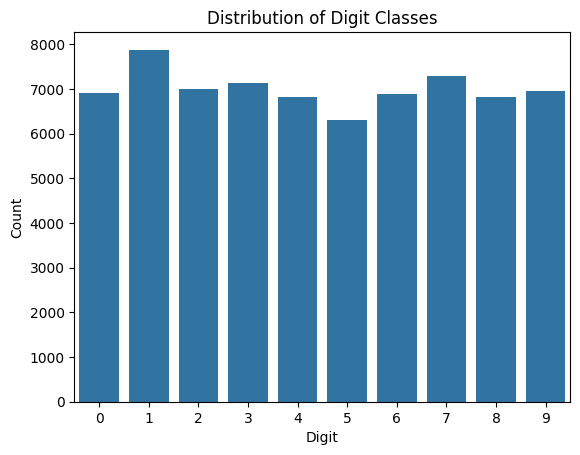

In [5]:
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Distribution of Digit Classes")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


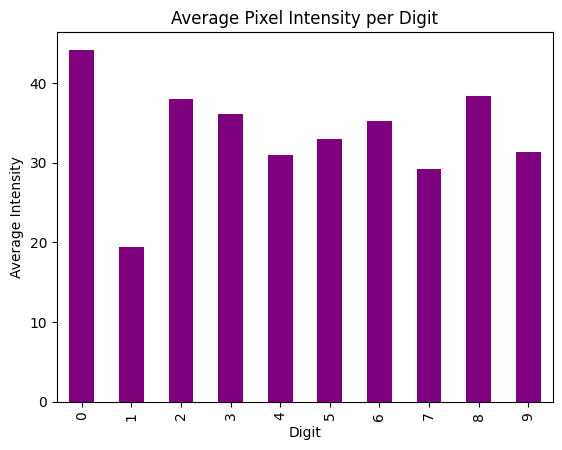

In [6]:
avg_intensity = df.groupby('label').mean().mean(axis=1)

avg_intensity.plot(kind='bar', color='purple')
plt.title("Average Pixel Intensity per Digit")
plt.ylabel("Average Intensity")
plt.xlabel("Digit")
plt.show()


<ipython-input-7-537548d2accb>:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


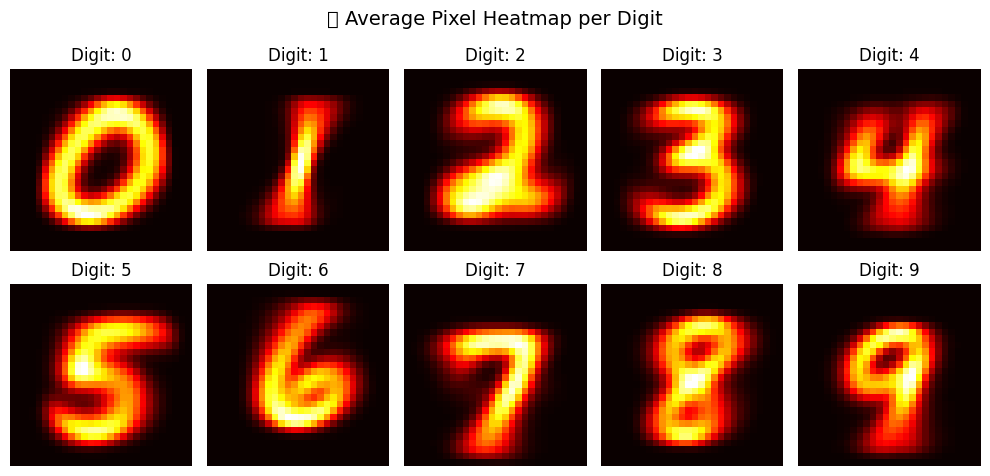

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for digit in range(10):
    # Get average of all images with the same digit
    avg_digit = df[df['label'] == digit].drop('label', axis=1).mean().values.reshape(28, 28)

    ax = axes[digit // 5, digit % 5]
    ax.imshow(avg_digit, cmap='hot')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.suptitle("🔍 Average Pixel Heatmap per Digit", fontsize=14)
plt.tight_layout()
plt.show()


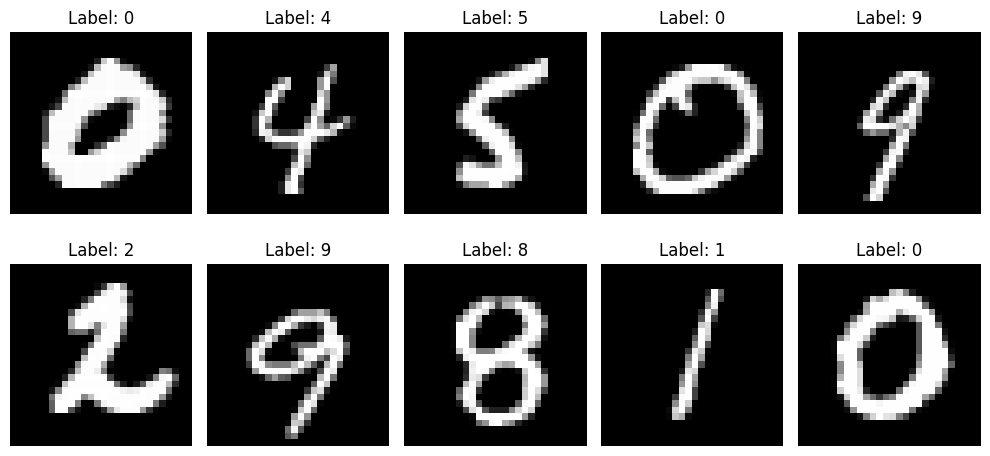

In [ ]:
# Plot random samples from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax in axes.ravel():
    index = np.random.randint(0, len(df))
    image = df.drop('label', axis=1).iloc[index].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {df['label'].iloc[index]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [8]:
# Separate features and target
X = df.drop('label', axis=1).values
y = df['label'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (56000, 784)
Training Labels Shape: (56000,)
Testing Features Shape: (14000, 784)
Testing Labels Shape: (14000,)


In [14]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9155
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



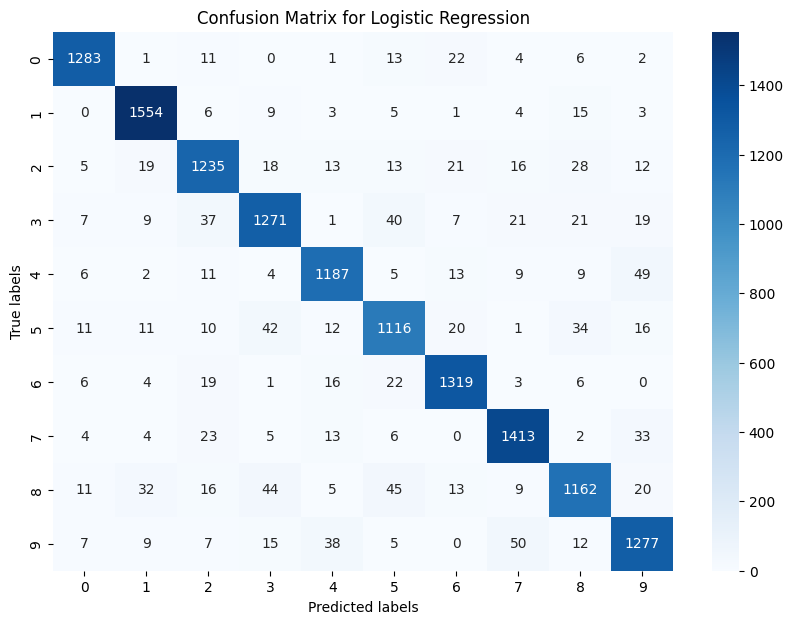

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [15]:
# Initialize and train the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



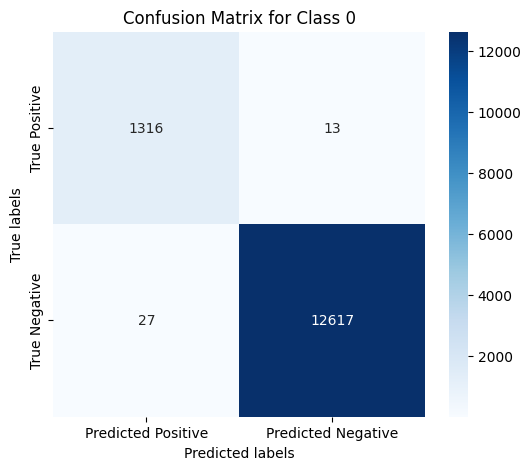

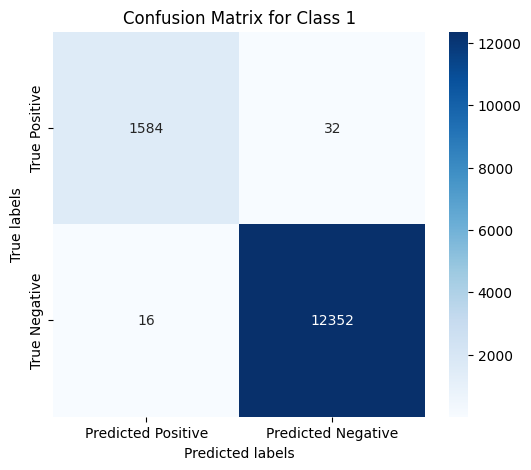

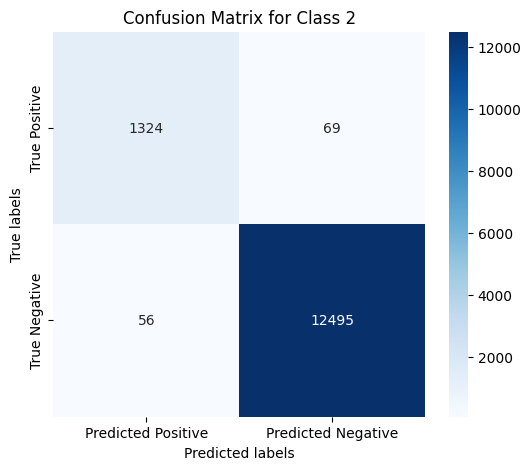

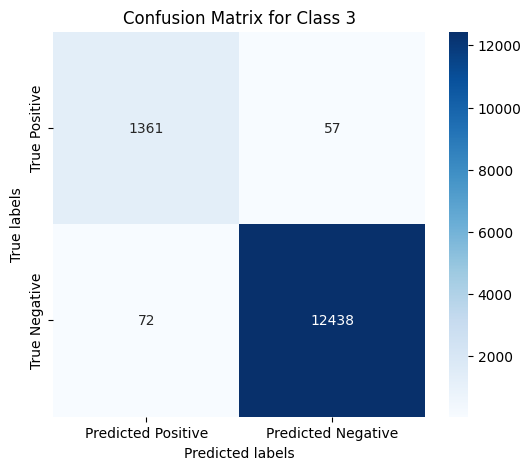

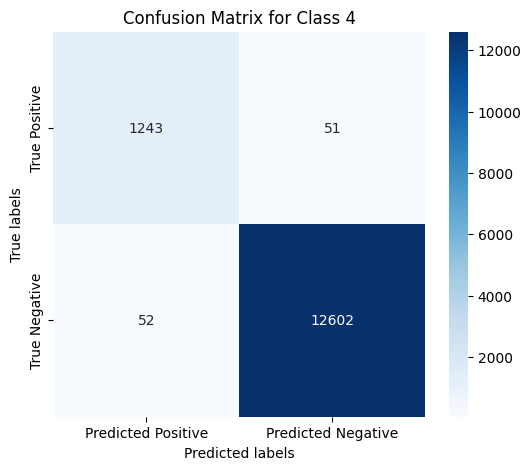

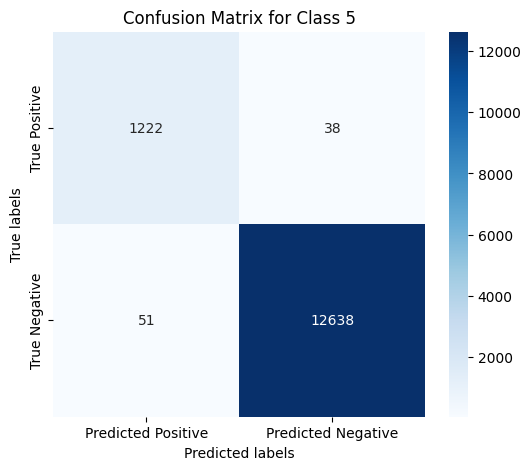

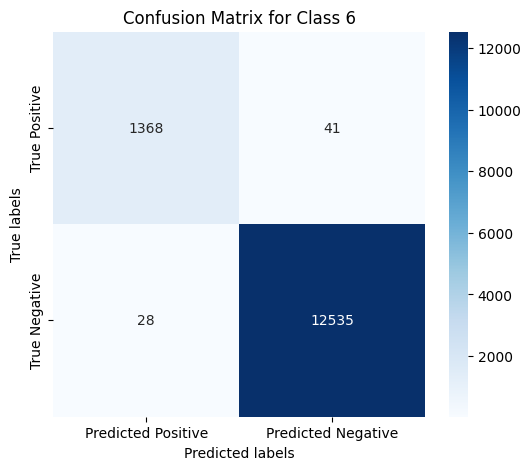

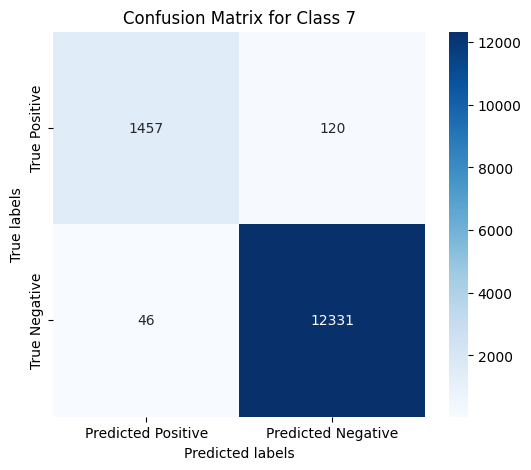

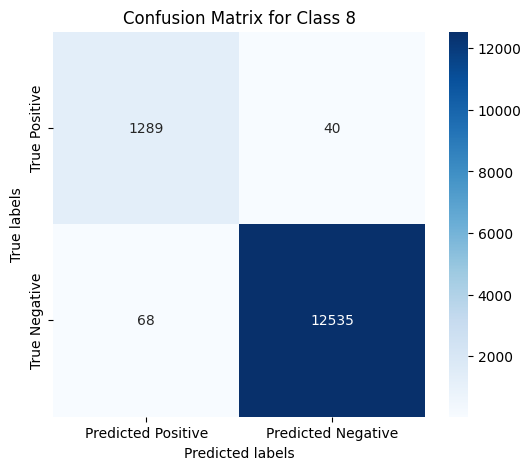

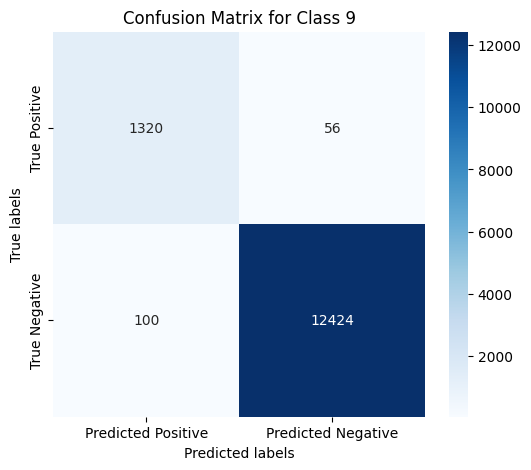

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given data
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
support = [1343, 1600, 1380, 1433, 1295, 1273, 1396, 1503, 1357, 1420]
precision = [0.99, 0.98, 0.95, 0.96, 0.96, 0.97, 0.97, 0.92, 0.97, 0.96]
recall = [0.98, 0.99, 0.96, 0.95, 0.96, 0.96, 0.98, 0.97, 0.95, 0.93]

# Simulate confusion matrix components for each class
for i in range(len(classes)):
    tp = int(support[i] * recall[i])  # True Positives
    fp = int(support[i] * (1 - precision[i]))  # False Positives
    fn = support[i] - tp  # False Negatives
    tn = sum(support) - support[i] - fp - fn  # True Negatives (Assumed)

    # Confusion matrix for the current class
    cm_class = np.array([[tp, fp], [fn, tn]])

    # Plotting confusion matrix for the current class
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_class, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Positive", "Predicted Negative"], yticklabels=["True Positive", "True Negative"])

    # Adding labels and title
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for Class {classes[i]}')

    # Show the plot
    plt.show()
